<a href="https://colab.research.google.com/github/madeintianjin/ucl_final_project/blob/main/Detectron2_mask_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
!pip install pyyaml==5.1

import torch
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 9.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=856eb6030027b9def0e288becfccdc4bdf0fe66776ba4480d8379e3c4f79424c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.5 MB/s eta 0:13:28tcmalloc: large alloc 1147494400 bytes == 0x3a644000 @  0x7fcd97053615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌

torch:  1.11 ; cuda:  cu113
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 4.3 MB/s 
     |████████████████████████████████| 50 kB 3.5 MB/s 
     |████████████████████████████████| 147 kB 13.4 MB/s 
     |████████████████████████████████| 130 kB 47.9 MB/s 
     |████████████████████████████████| 74 kB 3.5 MB/s 
     |████████████████████████████████| 843 kB 61.4 MB/s 
     |████████████████████████████████| 749 kB 48.4 MB/s 
     |████████████████████████████████| 112 kB 59.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=f474c35d857e368cc0628866dfedd68919c792a80b22a6f2c0df105ac8151501
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=dd53e001364c6e82f5595a146515d80bae

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from google.colab import drive
import tensorflow as tf
import glob

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Instance Segmentation

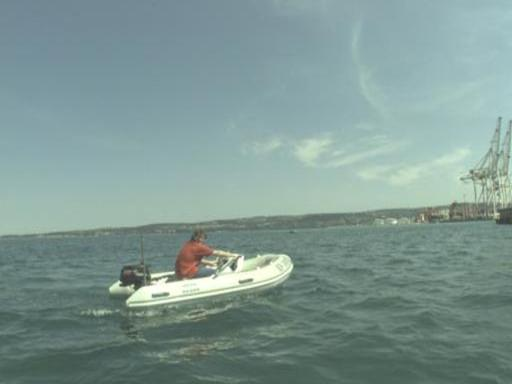

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("0109.jpg")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:01, 92.7MB/s]                          
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0, 8], device='cuda:0')
Boxes(tensor([[173.6211, 227.3210, 218.6800, 280.0527],
        [121.3086, 248.5954, 292.8872, 317.4249]], device='cuda:0'))


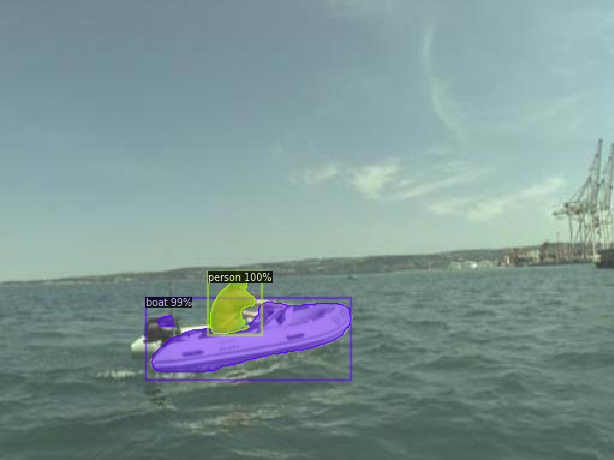

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Semantic Segmentation

We showcase simple demos of other types of models below:

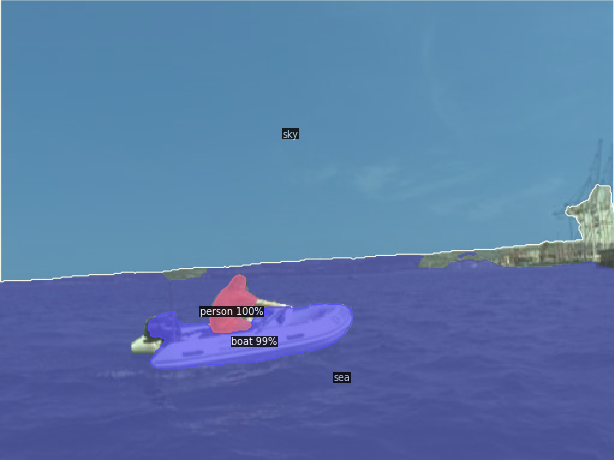

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
print(panoptic_seg)

tensor([[4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        ...,
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3]], device='cuda:0', dtype=torch.int32)


In [ ]:
import torch

In [ ]:
aa = panoptic_seg.cpu().detach().numpy()
def make_seg_mask(label_mat):
  #input is the panotic_seg tensor converted to numpy array
  mask = np.zeros((3,label_mat.shape[0],label_mat.shape[1]))
  for i in range(label_mat.shape[0]):
    for j in range(label_mat.shape[1]):
      if label_mat[i,j] == 0:
        mask[0,i,j] = 255
        mask[1,i,j] = 0
        mask[2,i,j] = 0
      elif label_mat[i,j] == 1:
        mask[0,i,j] = 0
        mask[1,i,j] = 255
        mask[2,i,j] = 0
      elif label_mat[i,j] == 2:
        mask[0,i,j] = 0
        mask[1,i,j] = 0
        mask[2,i,j] = 255
      elif label_mat[i,j] == 3:
        mask[0,i,j] = 255
        mask[1,i,j] = 255
        mask[2,i,j] = 0
      elif label_mat[i,j] == 4:
        mask[0,i,j] = 0
        mask[1,i,j] = 255
        mask[2,i,j] = 255
      elif label_mat[i,j] == 5:
        mask[0,i,j] = 175
        mask[1,i,j] = 0
        mask[2,i,j] = 175
      elif label_mat[i,j] == 6:
        mask[0,i,j] = 0
        mask[1,i,j] = 175
        mask[2,i,j] = 175
  
  mask = mask.transpose(1,2,0)
  
  return mask

In [ ]:
import matplotlib.pyplot as plt

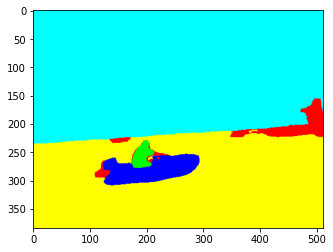

In [ ]:
# mask = make_seg_mask(aa)
plt.imshow(mask)

In [ ]:
def segmentation(img):
  panoptic_seg, segments_info = predictor(img)["panoptic_seg"]
  seg_output = panoptic_seg.cpu().detach().numpy()
  mask = make_seg_mask(seg_output)
  return mask

In [ ]:
%mkdir drive/MyDrive/test_mask_only

In [ ]:
real_files = sorted(glob.glob("drive/MyDrive/test_real_image/*.jpg"))
n = 0
for name in real_files:
  n += 1
  print('img',n)
  img = cv2.imread(name)
  mask = segmentation(img)
  # save_as = os.path.join('drive/MyDrive/train_mask_only/'+str(n)+'.jpg')
  vis = np.concatenate((mask, img), axis=1)
  cv2.imwrite('drive/MyDrive/test_mask_only/'+str(n)+'.jpg',mask)
  cv2.imwrite('drive/MyDrive/test/'+str(n)+'.jpg',vis)

img 1
img 2
img 3
img 4
img 5
img 6
img 7
img 8
img 9
img 10
img 11
img 12
img 13
img 14
img 15
img 16
img 17
img 18
img 19
img 20
img 21
img 22
img 23
img 24
img 25
img 26
img 27
img 28
img 29
img 30
img 31
img 32
img 33
img 34
img 35
img 36
img 37
img 38
img 39
img 40
img 41
img 42
img 43
img 44
img 45
img 46
img 47
img 48
img 49
img 50
img 51
img 52
img 53
img 54
img 55
img 56
img 57
img 58
img 59
img 60
img 61
img 62
img 63
img 64
img 65
img 66
img 67
img 68
img 69
img 70
img 71
img 72
img 73
img 74
img 75
img 76
img 77
img 78
img 79
img 80
img 81
img 82
img 83
img 84
img 85
img 86
img 87
img 88
img 89
img 90
img 91
img 92
img 93
img 94
img 95
img 96
img 97
img 98
img 99
img 100
img 101
img 102
img 103
img 104
img 105
img 106
img 107
img 108
img 109
img 110
img 111
img 112
img 113
img 114
img 115
img 116
img 117
img 118
img 119
img 120
img 121
img 122
img 123
img 124
img 125
img 126
img 127
img 128
img 129
img 130
img 131
img 132
img 133
img 134
img 135
img 136
img 137
img 138
img 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


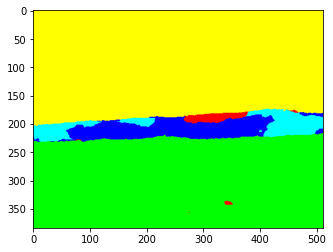

In [ ]:
plt.imshow(mask)

(384, 512, 3)


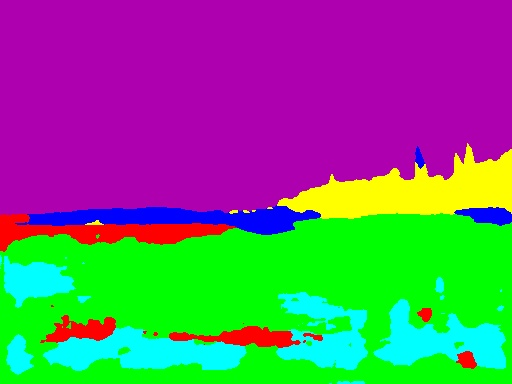

In [ ]:
pp = cv2.imread('drive/MyDrive/train_mask_only/34.jpg')
print(pp.shape)
cv2_imshow(pp)

In [ ]:
real_files = sorted(glob.glob("drive/MyDrive/test_real_image/*.jpg"))
input_files = sorted(glob.glob("drive/MyDrive/test_input_mask/*.png"))
n = 0
for x,y in zip(input_files,real_files):
  n += 1
  a = tf.io.read_file(x)
  a = tf.image.decode_jpeg(a, channels=3)

  b = tf.io.read_file(y)
  b = tf.image.decode_png(b, channels=3)
  
  vis = np.concatenate((a, b), axis=1)
  print(vis.shape)
  name = os.path.join(apath,str(n)+'.jpg')
  cv2.imwrite(name,vis)

# Run panoptic segmentation on a video

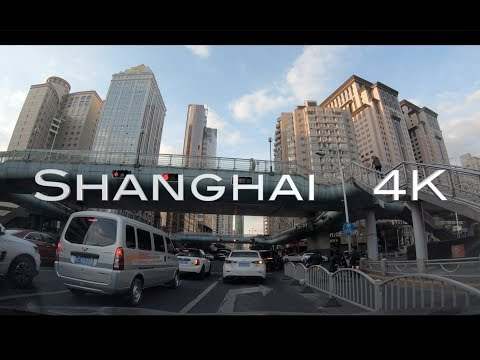

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("ll8TgCZ0plk", width=500)
display(video)

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=ll8TgCZ0plk -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
# Note: this is currently BROKEN due to missing codec. See https://github.com/facebookresearch/detectron2/issues/2901 for workaround.
%run detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mkv')